In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [88]:
df.shape

(6497, 13)

In [89]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [90]:
df.dropna(inplace=True)

In [91]:
df.shape

(6463, 13)

In [92]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [93]:
df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

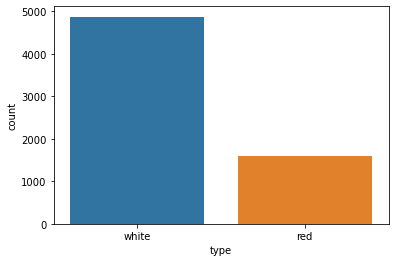

In [94]:
sns.countplot(x='type',data=df)

In [95]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 964.9+ KB


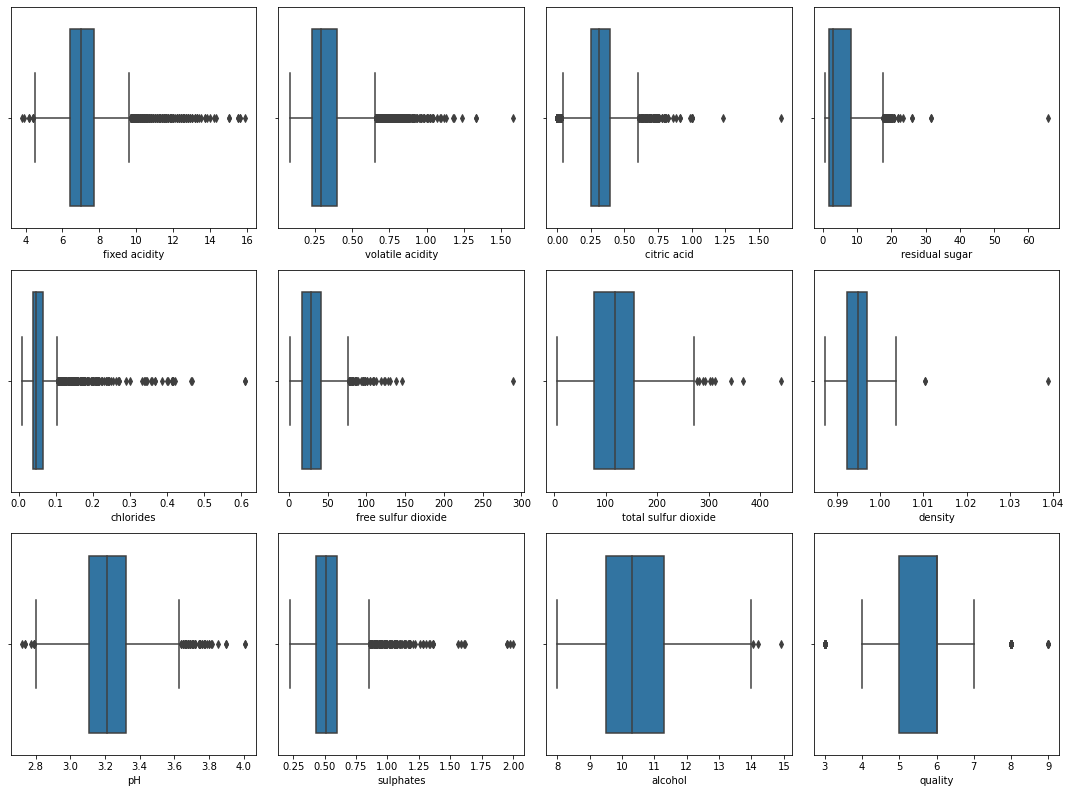

In [97]:
plt.figure(figsize=(15,18))

for i in range(1,len(df.columns)):
    plt.subplot(5,4,(i))
    sns.boxplot(x=df[(df.columns[i])])
    
plt.tight_layout()
plt.show()

In [98]:
# def drop_outliers(df, field_name):
#     iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
#     df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
#     df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

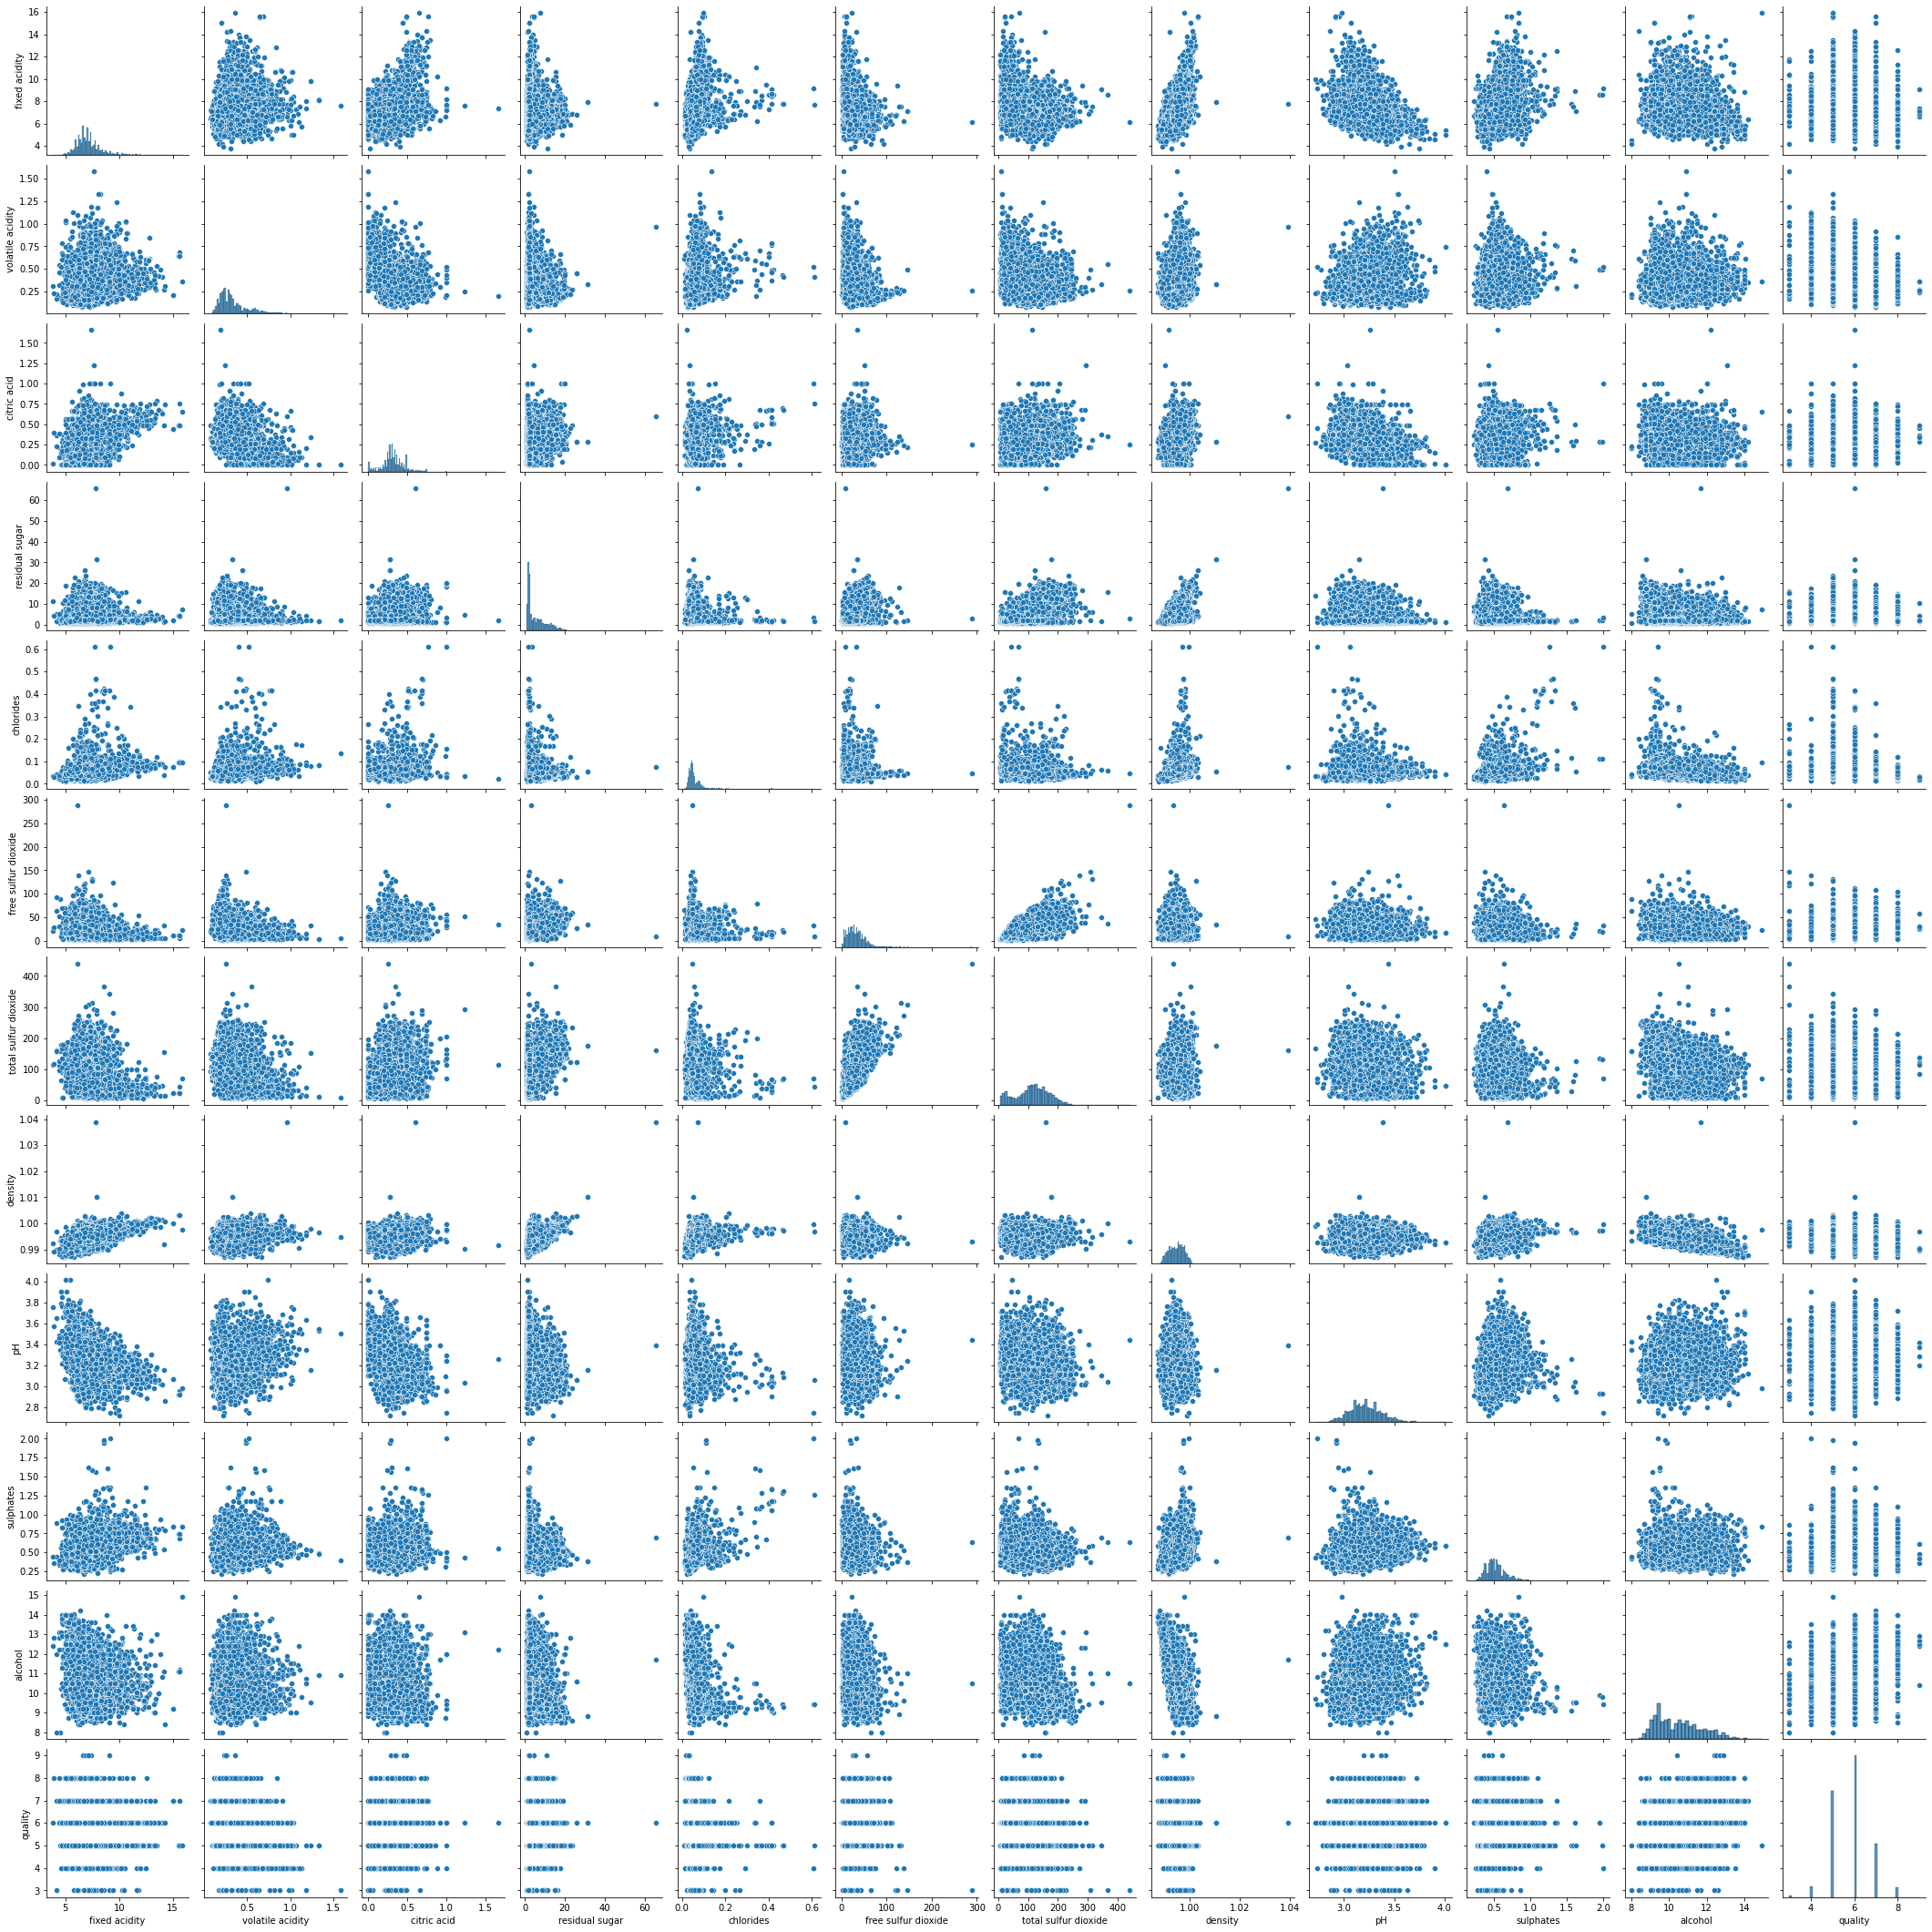

In [99]:
sns.pairplot(df)

## **How the data columns are distributed in the dataset?**

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

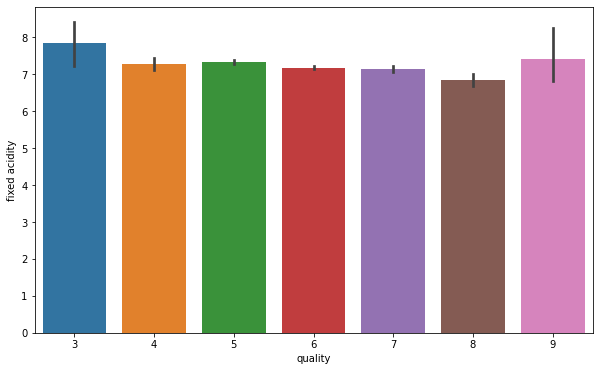

In [100]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

### fixed acidity does not give any specification to classify the quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

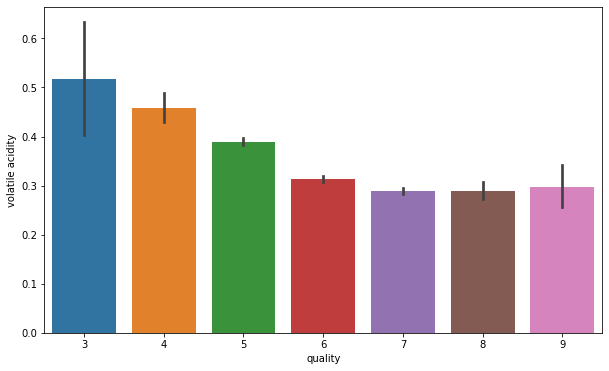

In [101]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

### It's a quite downing trend in the volatile acidity as the higher wine quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

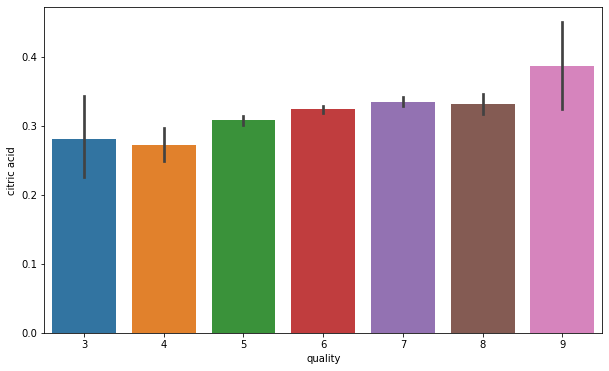

In [102]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

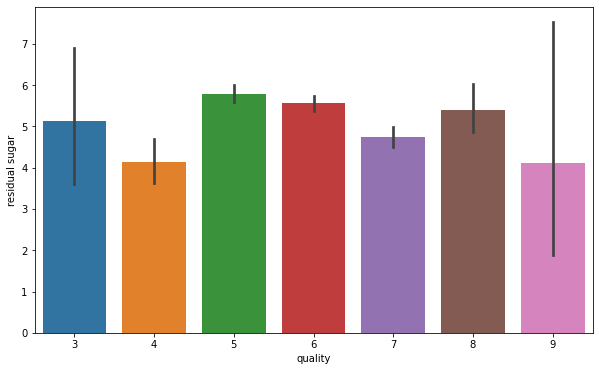

In [103]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

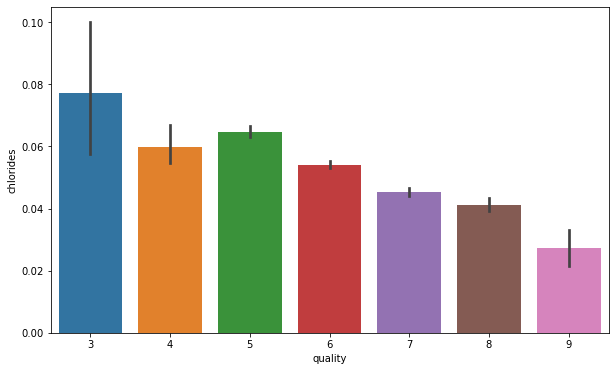

In [104]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

### Composition of chloride also go down as we go higher in the quality of the wine


<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

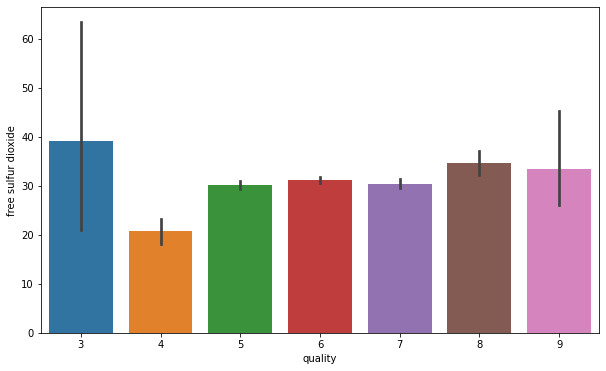

In [105]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

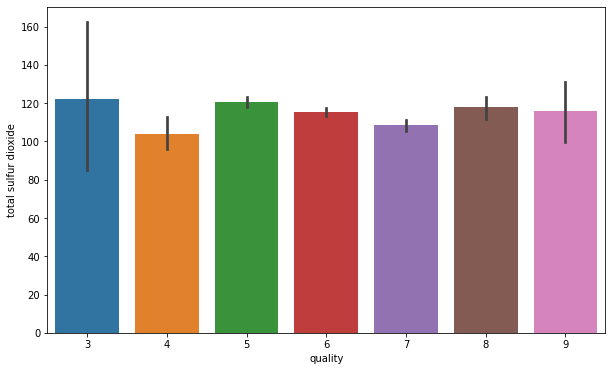

In [106]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

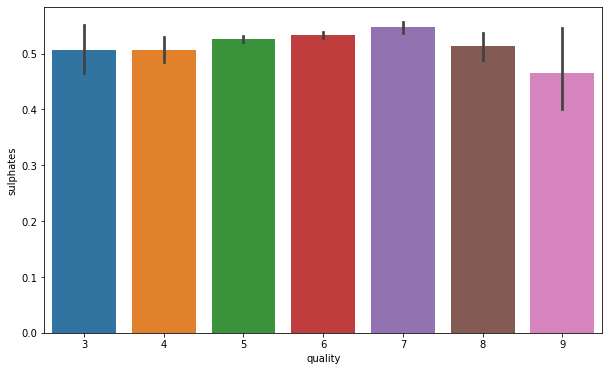

In [107]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<AxesSubplot:>

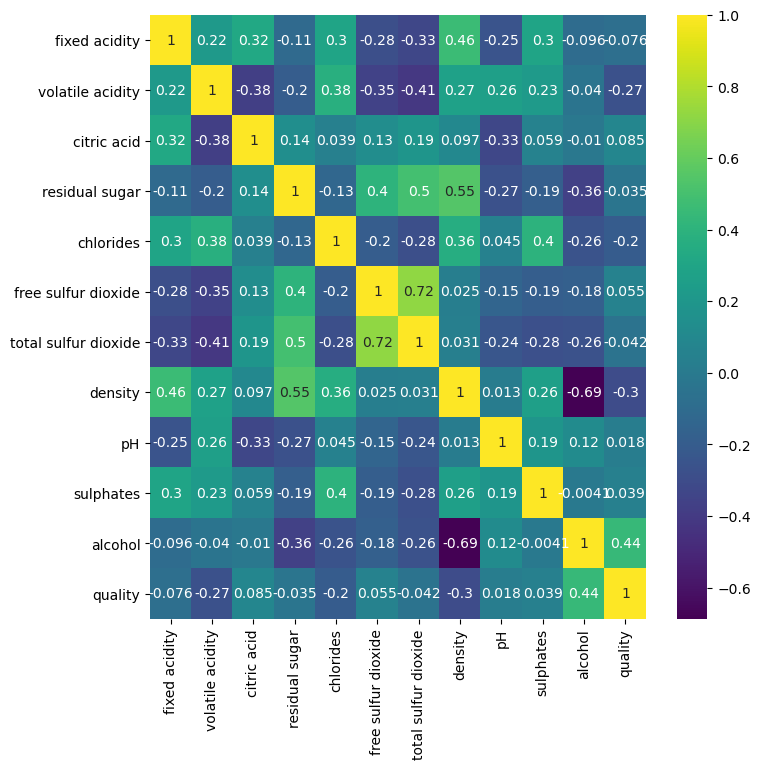

In [108]:
plt.figure(figsize=(8,8),dpi=100)
sns.heatmap(df.corr(),cmap='viridis',annot=True)

## **Preprocessing**

In [109]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import SGDClassifier
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [110]:
# Making binary classificaion for the response variable.
# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
label_quality = LabelEncoder()

In [113]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [114]:
df['quality'].value_counts()

0    5192
1    1271
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

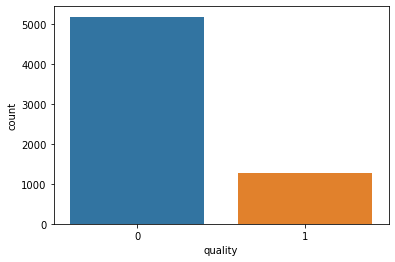

In [115]:
sns.countplot(df['quality'])

In [116]:
from sklearn.model_selection import train_test_split

In [126]:
X = df.drop('quality',axis=1)
y = df['quality']

In [129]:
X = X.drop('type',axis=1)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 138)

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
sc = StandardScaler()

In [133]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [142]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

## **Evaluating models**

LR: 0.806278 (0.020031)
KNN: 0.775176 (0.027869)
CART: 0.750267 (0.038051)
RF: 0.820826 (0.013879)
SVM: 0.794675 (0.015528)
XGB: 0.814635 (0.019730)
LightGBM: 0.816179 (0.021842)


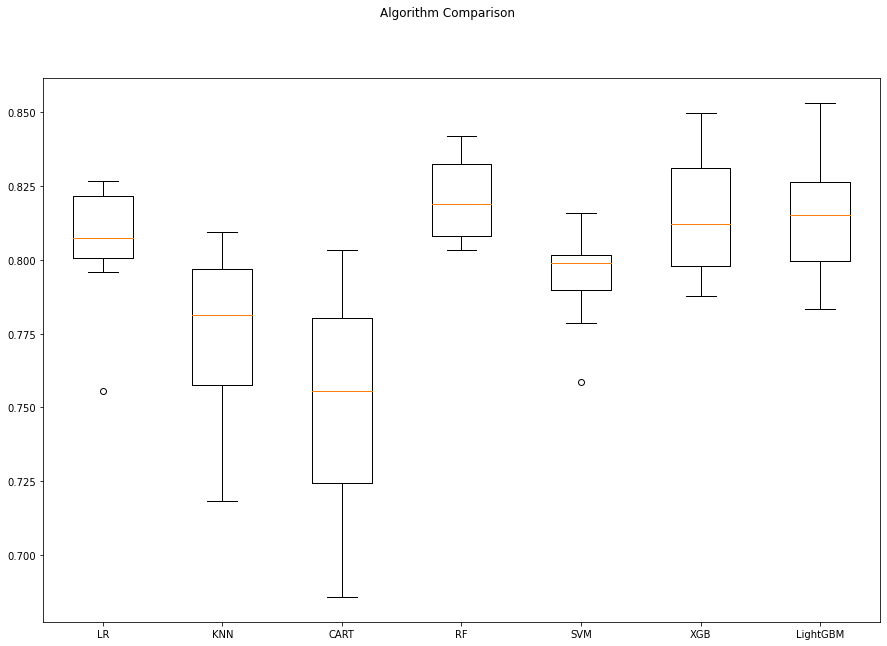

In [145]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))

results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10)
        
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## **Model Optimization**